In [95]:
import numpy as np
from scipy.linalg import svd, qr, eig, eigh, pinv
from scipy.linalg import inv as inv
from scipy.sparse.linalg import svds
import os
import matplotlib
import matplotlib.pyplot as plt


import DMD_JCL as DMD_JCL
import importlib
importlib.reload(DMD_JCL)

import data_analysis
importlib.reload(data_analysis)

%matplotlib inline
matplotlib.pyplot.rc('text', usetex=True)

fontsize = 18

In [70]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = simulation.import_data()

h, l = np.shape(x)
m = len(time)

# Jean-Christophe Loiseau' version

In [96]:
from code.DMD_JCL import dmd_analysis, evd_dmd


uf = np.zeros((u.shape[0],u.shape[1]*u.shape[2]))
for i in range(u.shape[0]):
  uf[i] = w[i].flatten()
print(u.shape,uf.shape,u.shape[1]+u.shape[2])

# --> apply DMD algorithm
rank = 10
sigma, P, Q = dmd_analysis(np.swapaxes(uf,0,1), y=None, rank=rank, rtol=1e-6)
print(P.shape,sigma.shape)
Phi, Psi, mu = evd_dmd(P, Q)
print(Phi.shape,mu.shape)

(6249, 81, 51) (6249, 4131) 132
(4131, 10) (10,)
(4131, 10) (10,)


In [97]:
print(rank)

10


In [98]:
# --> reconstruct dominant dynamical modes
eigenvalues = np.zeros((rank,))
modes = []
[modes.append([]) for i in range(rank)]
for i in range(rank):
  modes[i] = np.real(Phi[:,i])
  modes[i] = modes[i].reshape((u.shape[1],u.shape[2])) 
  print(modes[i].shape)

(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)


In [101]:
print(Phi[0])

[ 3.41624430e-14+0.00000000e+00j  3.67572402e-15+2.32952045e-14j
  3.67572402e-15-2.32952045e-14j -1.96600333e-15+0.00000000e+00j
 -3.94281020e-14+6.65922090e-15j -3.94281020e-14-6.65922090e-15j
  1.93293153e-14+0.00000000e+00j -2.04197255e-14+0.00000000e+00j
  7.07882258e-14-6.49499030e-15j  7.07882258e-14+6.49499030e-15j]


In [19]:
fig, ax = plt.subplots(figsize=(10,1.5*rank),nrows=rank+1)
cf0 = ax[0].contourf(x, z, umean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
for j in range(rank):
  cf0 = ax[j+1].contourf(x, z, modes[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(rank+1)]
# [ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode[j]*100, 3)}%') for j in range(num_modes)]
plt.tight_layout()
plt.show()

# Naive version

In [86]:
X = np.reshape(u,(m,h*l))
X = np.swapaxes(X, 0,1)
V1, V2 = X[:, :-1], X[:, 1:]

# First svd
U, Sigma, W = svd(V1, full_matrices=False)
W = W.T.conj()
Sigma_inv = pinv(np.diag(Sigma))
S = U.T.conj() @ V2 @ W @ Sigma_inv
eigenvalues, eigenvectors = eig(S)
Phi = np.zeros(np.shape(eigenvectors))
for i in range(np.shape(eigenvectors)[1]):
    Phi[i] = U @ eigenvectors[:,i]

/tmp/ipykernel_10017/2414125969.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  Phi[i] = U @ eigenvectors[:,i]


In [93]:
indices_of_max_values = eigenvalues.argsort()[-10:][::-1]
rank = 10

# TKE = np.sum(np.real(eigenvalues))
# KE_mode = []
modes = []
[modes.append([]) for i in range(rank)]
for i,j in enumerate(indices_of_max_values):
  # KE_mode.append(np.real(eigenvalues)[j]/TKE)
  modes[i] = np.real(U @ eigenvectors[:,j])
  modes[i] = modes[i].reshape((h,l)) 
  print(modes[i].shape)

(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)


In [ ]:
fig, ax = plt.subplots(figsize=(10,1.5*rank),nrows=rank+1)
cf0 = ax[0].contourf(x, z, wmean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
for j in range(rank):
  cf0 = ax[j+1].contourf(x, z, modes[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(rank+1)]
# [ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode[j]*100, 3)}%') for j in range(rank)]
plt.tight_layout()
plt.show()

In [87]:
print(np.shape(S))

(4131, 4131)


#### First svd

In [10]:
print(np.shape(U), np.shape(np.swapaxes(U,0,1)))
V1 = np.swapaxes(U,0,1)
V1, V2 = V1[:, :-1], V1[:, 1:]

# First svd
U, Sigma, W = svd(V1, full_matrices=False)
W = W.T.conj()


(6249, 4131) (4131, 6249)


#### Calcul of S

In [5]:
print(np.shape(V1))
print(np.shape(U), np.shape(Sigma), np.shape(W))

(4131, 6248)
(4131, 4131) (4131,) (6248, 4131)


In [11]:
Sigma_inv = pinv(np.diag(Sigma))

In [ ]:
print(np.shape(U.T), np.shape(V2), np.shape(W), np.shape(Sigma_inv))

(4131, 4131) (4131, 6248) (6248, 4131) (4131, 4131)


In [12]:
S = U.T.conj() @ V2 @ W @ Sigma_inv

#### Eigenvectors

In [14]:
eigenvalues, eigenvectors = eig(S)

In [18]:
print(np.shape(eigenvectors), np.shape(U))

(4131, 4131) (4131, 4131)


In [15]:
Phi = np.zeros(np.shape(eigenvectors))
for i in range(np.shape(eigenvectors)[1]):
    Phi[i] = U @ eigenvectors[:,i]

/tmp/ipykernel_10017/3901067790.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  Phi[i] = U @ eigenvectors[:,i]


In [20]:
print( np.shape(Phi))

(4131, 4131)


In [8]:
indices_of_max_values = eigenvalues.argsort()[-10:][::-1]
rank = 10

# TKE = np.sum(np.real(eigenvalues))
# KE_mode = []
modes = []
[modes.append([]) for i in range(rank)]
for i,j in enumerate(indices_of_max_values):
  # KE_mode.append(np.real(eigenvalues)[j]/TKE)
  modes[i] = np.real(U @ eigenvectors[:,j])
  modes[i] = modes[i].reshape((h,l)) 
  print(modes[i].shape)

(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)


In [33]:
print(np.shape(wmean))

(6249, 81, 51)


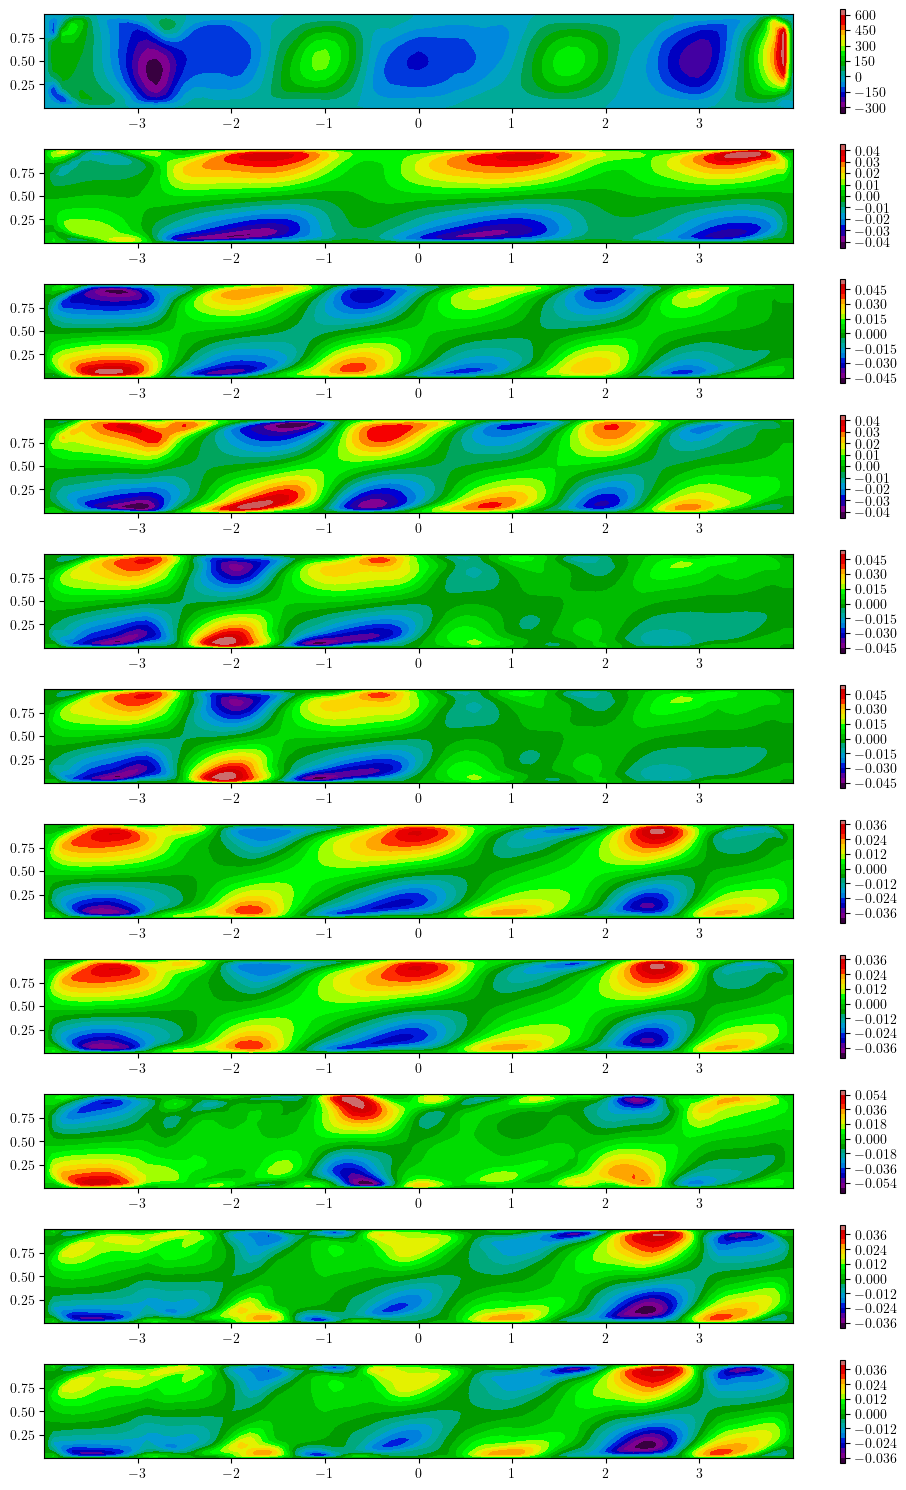

In [96]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(figsize=(10,1.5*rank),nrows=rank+1)
cf0 = ax[0].contourf(x, z, wmean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
for j in range(rank):
  cf0 = ax[j+1].contourf(x, z, modes[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(rank+1)]
# [ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode[j]*100, 3)}%') for j in range(rank)]
plt.tight_layout()
plt.show()

# Cleaned

In [21]:
b_k = pinv(Phi) @ X  # Assuming X contains the original data snapshots

# Reconstruct the data
reconstructed_data = Phi @ b_k

In [28]:
print(np.shape(reconstructed_data))
print(np.shape(X))

(4131, 6249)
(4131, 6249)


In [25]:
residual = X - reconstructed_data

# Step 3: Compute the residual norm
residual_norm = np.linalg.norm(residual, 'fro')

In [29]:
print(residual_norm/np.size(X))

0.015718368093309086


In [24]:
print(X)

[[ 1.0072094e-09  1.0023614e-09  1.4017338e-09 ...  6.0194115e-10
   2.3101180e-10  1.8354039e-09]
 [ 2.0852172e-06  1.7778958e-06  2.8091629e-06 ...  2.6855670e-06
  -1.4098425e-06  1.8435054e-07]
 [ 5.0384322e-07 -7.7218759e-07  6.0179821e-07 ...  1.2991734e-06
  -6.1553718e-07 -9.5761094e-06]
 ...
 [-1.0731956e-07  4.6316904e-08  1.0463843e-07 ...  4.9809341e-08
  -1.2958619e-07 -9.0565510e-08]
 [ 3.0767719e-07 -1.1953721e-07 -5.9601991e-07 ...  2.6386590e-07
  -3.7771664e-07 -5.3320554e-07]
 [ 5.8747199e-11 -6.3670617e-11 -2.9385834e-10 ... -1.5981530e-10
  -2.2090080e-10 -2.7156713e-10]]


In [80]:
import DMD
importlib.reload(DMD)
from DMD import DMD


In [75]:

dmd = DMD(simulation)

Phi = dmd.compute_dmd()
reconstructed_data = dmd.reconstruct_data()
residual_norm = dmd.residual_norm()

In [85]:
print(np.shape(dmd.eigenvectors))

AttributeError: 'DMD' object has no attribute 'eigenvectors'

In [73]:
print(np.shape(simulation.u))

(6249, 81, 51)


In [81]:
import copy

n_snapshots = 10
simu = copy.copy(simulation)
residual_norms = []
for n in range(3, n_snapshots):
    print(n)
    simu.u = simulation.u[:n,:,:]
    print(np.shape(simu.u))
    simu.m = n
    dmd_simu = DMD(simu)
    Phi_simu = dmd_simu.compute_dmd()
    reconstructed_data_simu = dmd_simu.reconstructed_data()
    residual_norms.append(dmd_simu.residual_norm()/np.size(simu.X))

3
(3, 81, 51)


NameError: name 'eigenvectors' is not defined